PROJECT TITLE-FACIAL EMOTION RECOGNISITION

importing the required libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from scipy import *

# Define image size and batch size
IMG_SIZE1 = 70
IMG_SIZE2 = 110
BATCH_SIZE = 40

Training and validating the data

In [2]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/DAP_TEAM5/22A81A0541/face recognisation/train',
    target_size=(IMG_SIZE1, IMG_SIZE2),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/DAP_TEAM5/22A81A0541/face recognisation/train',
    target_size=(IMG_SIZE1, IMG_SIZE2),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/DAP_TEAM5/22A81A0541/face recognisation/test',
    target_size=(IMG_SIZE1, IMG_SIZE2),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 4079 images belonging to 6 classes.
Found 1015 images belonging to 6 classes.
Found 1536 images belonging to 2 classes.


Sequential model in Keras with convolutional and pooling layers followed by dense layer

In [3]:
model = keras.Sequential([
    layers.Conv2D(40, (3, 3), activation='relu', input_shape=(IMG_SIZE1, IMG_SIZE2, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(80, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(160, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(160, activation='relu'),
    layers.Dense(80, activation='relu'),
    layers.Dense(40, activation='relu'),
    layers.Dense(6, activation='softmax')
])

In [4]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Running the epochs for the processing of the images


In [5]:
history = model.fit(train_generator,validation_data=val_generator,epochs=3)

Epoch 1/3
102/102 [==============================] - 962s 9s/step - loss: 0.4293 - accuracy: 0.3055 - val_loss: 0.3961 - val_accuracy: 0.4739
Epoch 2/3
102/102 [==============================] - 134s 1s/step - loss: 0.3136 - accuracy: 0.5354 - val_loss: 0.3485 - val_accuracy: 0.5507
Epoch 3/3
102/102 [==============================] - 135s 1s/step - loss: 0.2731 - accuracy: 0.6097 - val_loss: 0.3710 - val_accuracy: 0.4768


saving the weighted file(model.h5)

In [6]:
model.save("Model.h5","label.txt")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


predicting the image facial expression and concluding the final output

1/1 [==============================] - 0s 175ms/step
Predicted class: Happy


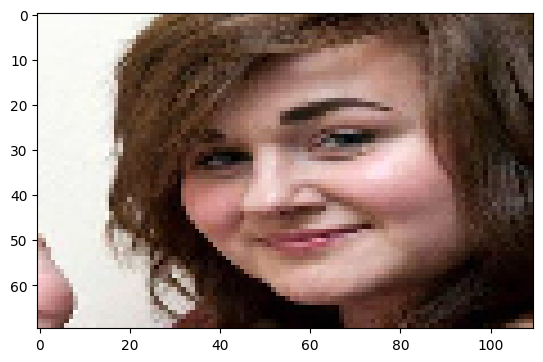

In [9]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
model = keras.models.load_model('Model.h5')
img_path='/content/drive/MyDrive/DAP_TEAM5/22A81A0541/face recognisation/train/Happy/0b052077556e295064a937db8d10cf6970818952bc9803d45e7f5ae4.jpg'
img = image.load_img(img_path, target_size=(IMG_SIZE1, IMG_SIZE2))
plt.imshow(img)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.
class_labels = {0: "Angry",1: "Happy",2: "Neutral",3: "Sad",4: "Surprise"}
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)
print("Predicted class:", class_labels[predicted_class])
predicted_class = np.argmax(predictions)
